# Report of Titanic

## Data analysis
## 数据分析

First, use pandas to analyze the data:

load the necessary libraries.

首先利用pandas对数据进行分析：

载入必要的函数库

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data.

载入数据

In [68]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

Check the feature categories. As shown below, there are 11 types of features (excluding Survived), of which 6 are numeric features and 5 are non-numerical features.

首先检查特征类别，如下所示，共有11类特征（不包括Survived）， 其中6类数值特征，5类非数值特征。

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There are default values in the data set, check the default values of various features here:

经过前期了解，数据集中存在缺省值，所以在这里检查各类特征的缺省值：

In [70]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As shown above, there are default values in Age and Carbin, we will do some processing later.

如上图所示，Age和Carbin中存在较多的缺省值，我们将在后面进行一些处理。

Check the data set's numerical features:

对数值特征进行例行的数据统计并查看：

In [71]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age and Fare can be understood as continuous features, we have performed the following analysis:

其中Age和Fare可以理解为连续特征，，我们在下面进行了相应的分析：

Age and cost histograms:

年龄和费用直方图：

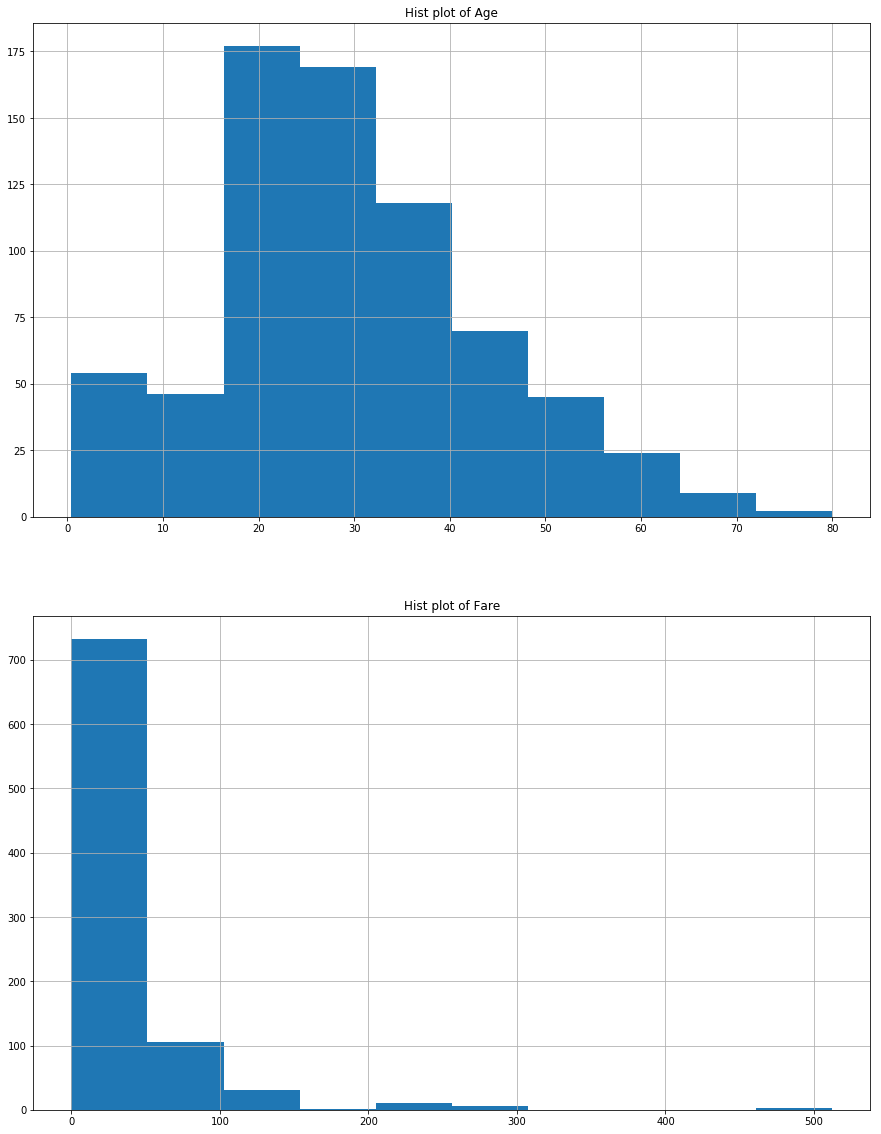

In [72]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(15,20))
train["Age"].hist(ax=ax[0])
ax[0].set_title("Hist plot of Age")
train["Fare"].hist(ax=ax[1])
ax[1].set_title("Hist plot of Fare")
plt.show()

It shows that the passengers of this trip are mainly young and middle-aged; most of the expenses are in the lower segment and a few are in the high segment.

可以看出，本次旅行的乘客以青壮年为主；费用多数在较低段位，少数为高段位。

The relationship between age and cost and whether been saved:

年龄和费用与是否获救之间的关系：

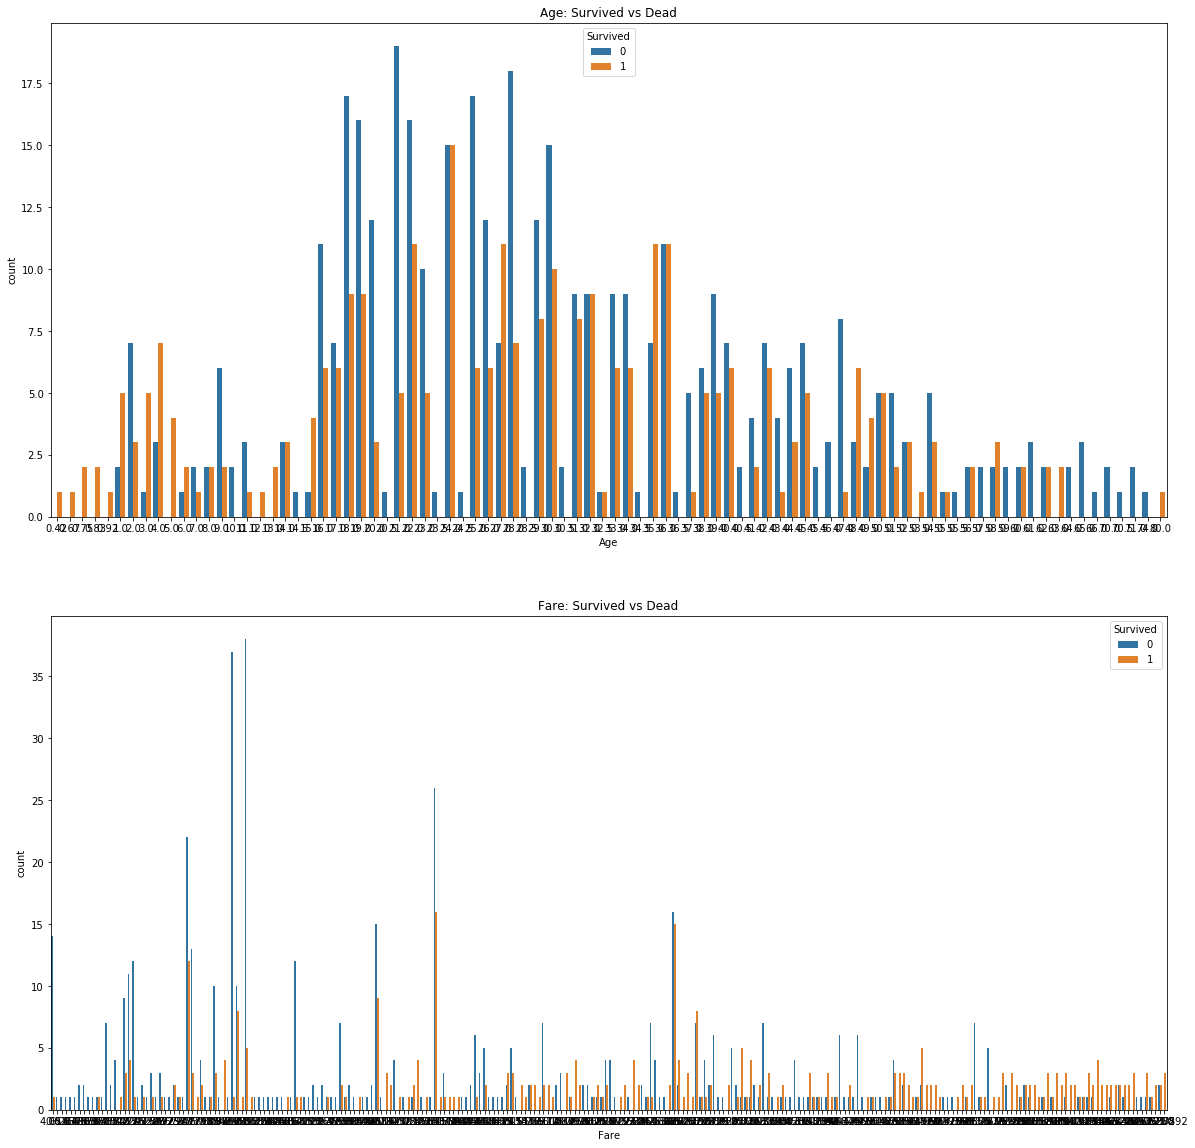

In [73]:
fig2,ax2 = plt.subplots(2,1,figsize=(20,20))
sns.countplot('Age',hue='Survived',data=train,ax=ax2[0])
ax2[0].set_title('Age: Survived vs Dead')
sns.countplot('Fare',hue='Survived',data=train,ax=ax2[1])
ax2[1].set_title('Fare: Survived vs Dead')
plt.show()

From the above results, it can be seen whether the rescue of Age and Fare is not random and can be used as a comparatively valuable feature. For example, in Age, the unrecovered proportion of young adults is significantly higher than other age groups; in Fare, the higher-cost range has a higher percentage of people rescued.

从上面的结果可以看出，在Age和Fare两项上，是否获救都不是随机的,可做作为比较有价值的特征。例如，在Age方面，青壮年的未获救比例显著高于其他年龄段；而在Fare方面，费用较高的区间，获救比例较高。

Next, analyze the relationship between gender and whether been rescued:

接下来分析性别和是否获救的关系：

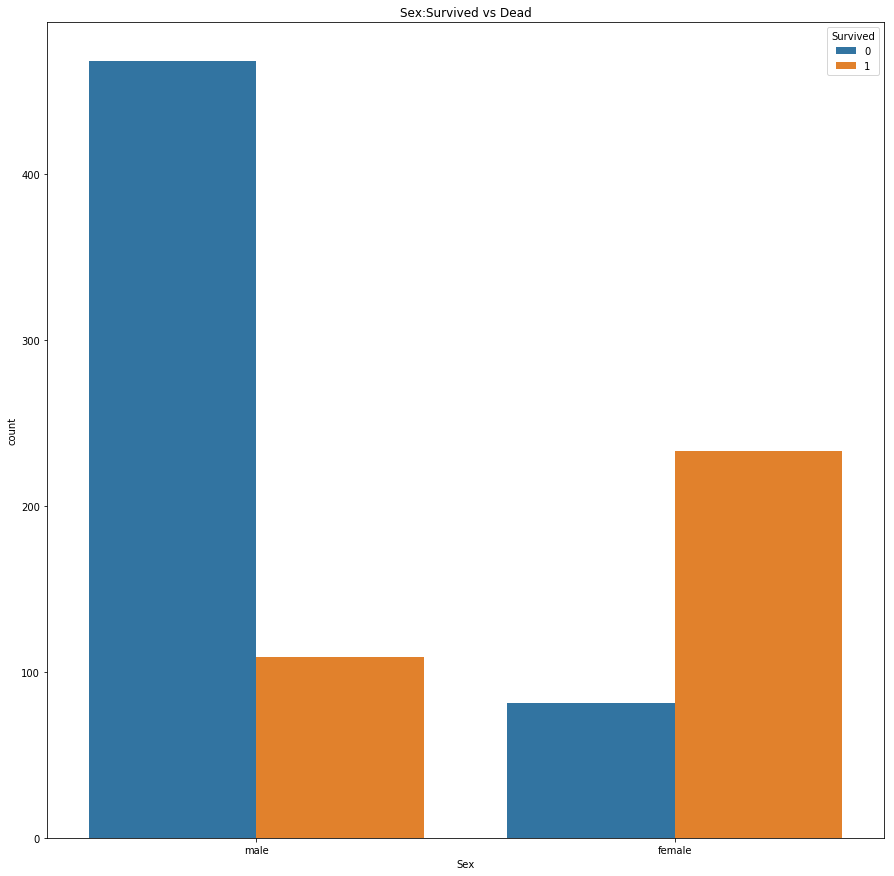

In [74]:
f,ax=plt.subplots(1,1,figsize=(15,15))
sns.countplot('Sex', hue='Survived',data=train,ax=ax)
ax.set_title('Sex:Survived vs Dead')
plt.show()

As shown above, there is a clear relationship between gender and salvage, and the rate of female salvage is significantly higher than that of males and can be directly characterized.

如上图所示，性别与是否获救有明显的关系，女性获救率明显高于男性，可以直接作为特征。

The relationship between cabin grade, number of family members and whether they are rescued:

船舱等级、家人数量与是否获救的关系：

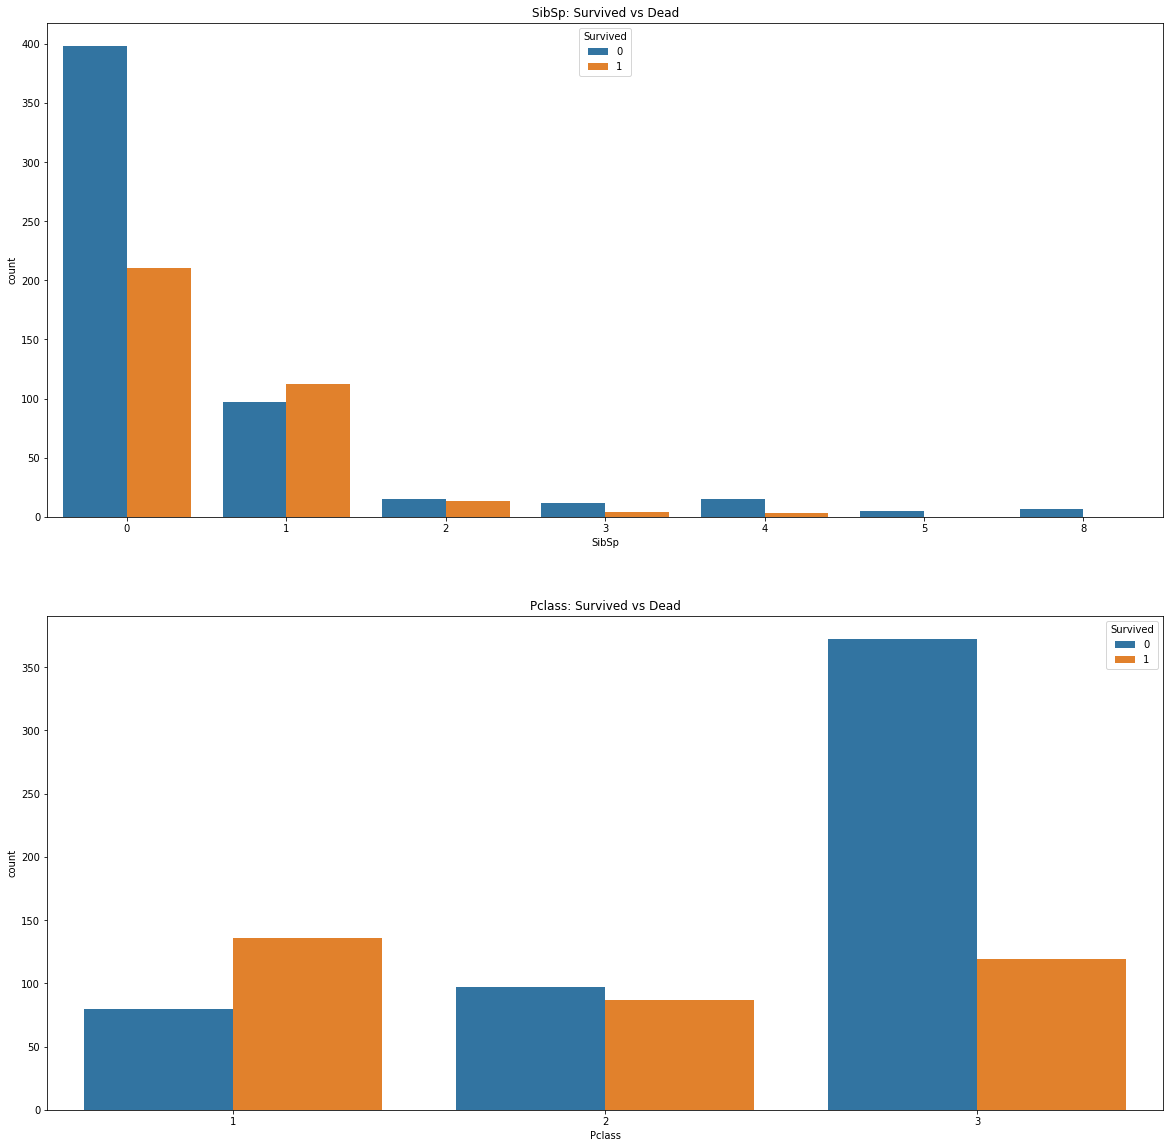

In [75]:
fig2,ax2 = plt.subplots(2,1,figsize=(20,20))
sns.countplot('SibSp',hue='Survived',data=train,ax=ax2[0])
ax2[0].set_title('SibSp: Survived vs Dead')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax2[1])
ax2[1].set_title('Pclass: Survived vs Dead')
plt.show()

It can be seen that the rescue rate of passengers with one or two spouses is relatively high, and there is a significant correlation between the level of cabins and whether they are rescued.

可以看出，拥有一个或两个配偶的乘客获救率相对较高，而船舱等级高低与是否获救有显著的相关性。

## Preprocessing
## 数据预处理

Process the passenger seat number and assign the missing value to Unknown.

From the passenger seat number data, it can be found that the first letter may represent the cabin number. Extract the character and assigned it to Cabin, which is regarded as the cabin number.

对乘客座位号数据进行处理，将缺失值赋值为Unknown。
从乘客座位号数据可以发现，第一个字母可能代表了船舱号码，将该字符提取出来，赋值给Cabin，视为船舱号。


In [76]:
train.Cabin.fillna("Unknown",inplace=True)
for i in range(0, 891):
    train.Cabin[i]= train.Cabin[i][0]

test.Cabin.fillna("Unknown",inplace=True)
for i in range(0, 417):
    test.Cabin[i]= test.Cabin[i][0]

c:\users\del\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
c:\users\del\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The missing values of age are filled in with the mean of age, and the missing values of the departure port are filled with the mode of departure port.

用年龄的均值填充年龄的缺失值，用出发港口的众数填补出发港口的缺失值。

In [78]:
train.Age.mean()
train.Age.fillna(29.7,inplace=True)
train.Embarked.fillna("S",inplace=True)

test.Age.fillna(29.7,inplace=True)
test.Embarked.fillna("S",inplace=True)
temp = test.Fare.mean()
test.Fare.fillna(temp,inplace=True)

According to the above analysis results and the relationship between variables, the age data are segmented into 0-5 years old, 5-15 years old, 15-20 years old, 20-35 years old, 35-50 years old, 50-60 years old, 60-100 years old 7 paragraphs.
The Parch variable is divided into three segments with a number of zero, a number of one or two, and a number greater than two. Divide the SibSp variable into a number of 0, a number of 1 or 2, and a number greater than two. The Cabin variable is divided into two parts: missing and not missing.

根据以上分析结果和变量间的关系，将年龄数据分段为0-5岁、5-15岁、15-20岁、20-35岁、35-50岁、50-60岁、60-100岁7段。
将Parch变量分成数目为0、数目为1或2、数目为大于2三段。将SibSp变量分成数目为0、数目为1或2、数目为大于2三段。将Cabin变量分为缺失和没有缺失两段。

In [79]:
test.age=pd.cut(test.Age,[0,5,15,20,35,50,60,100])
train.age=pd.cut(train.Age,[0,5,15,20,35,50,60,100])

train.Parch[(train.Parch>0) & (train.Parch<=2)]=1
train.Parch[train.Parch>2]=2
train.SibSp[(train.SibSp>0) & (train.SibSp<=2)]=1
train.SibSp[train.SibSp>2]=2
train.Cabin[train.Cabin!="U"]="K"

test.Parch[(test.Parch>0) & (test.Parch<=2)]=1
test.Parch[test.Parch>2]=2
test.SibSp[(test.SibSp>0) & (test.SibSp<=2)]=1
test.SibSp[test.SibSp>2]=2
test.Cabin[test.Cabin!="U"]="K"

c:\users\del\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\del\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\del\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\del\appdata\local\programs\python\python35-32\lib\site-

Create dummy variables for Pclass, Sex, Embarked, Parch, SibSp, Cabin variables.

为Pclass、Sex、Embarked、Parch、SibSp、Cabin变量创建虚拟变量。

In [80]:
dummy_Pclass = pd.get_dummies(train.Pclass, prefix='Pclass')
dummy_Sex = pd.get_dummies(train.Sex, prefix='Sex')
dummy_Embarked = pd.get_dummies(train.Embarked, prefix='Embarked')
dummy_Parch = pd.get_dummies(train.Parch, prefix='Parch')
dummy_SibSp = pd.get_dummies(train.SibSp, prefix='SibSp')
dummy_Age = pd.get_dummies(train.age, prefix='Age')
dummy_Cabin = pd.get_dummies(train.Cabin, prefix='Cabin')

dummy_PclassT = pd.get_dummies(test.Pclass, prefix='Pclass')
dummy_SexT = pd.get_dummies(test.Sex, prefix='Sex')
dummy_EmbarkedT = pd.get_dummies(test.Embarked, prefix='Embarked')
dummy_ParchT = pd.get_dummies(test.Parch, prefix='Parch')
dummy_SibSpT = pd.get_dummies(test.SibSp, prefix='SibSp')
dummy_AgeT = pd.get_dummies(test.age, prefix='Age')
dummy_CabinT = pd.get_dummies(test.Cabin, prefix='Cabin')

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score,classification_report

Create a training set

Divide the training set and use passengers numbered 0-623 as the training set. Remove the PassengerId and Name variables and add the constant term Intercept. The dependent variable is whether the passenger is rescued. The independent variables are passenger fare, gender, number of embarkation terminals, number of parents and children, number of siblings and spouses, age, cabin. Except the fare, all are dummy variables. Taking into account the linear correlation between Fare and Pclass, remove the Pclass variable.

创建训练集

划分训练集，将编号为0-623的乘客作为训练集。去除PassengerId和Name变量，添加常数项Intercept. 因变量为乘客是否获救，自变量为乘客的票价、性别、登船码头、父母与子女数目、兄弟姐妹与配偶数目、年龄、船舱。除票价外，都为虚拟变量。考虑到Fare和Pclass之间的线性相关性，剔除Pclass变量。

In [82]:
train_y = train[:]["Survived"]
cols_to_keep = ["Fare"]
train_x = train[:][cols_to_keep].join(dummy_Sex.ix[:, "Sex_male":]).join(dummy_Embarked.ix[:,"Embarked_Q":]).join(dummy_Parch.ix[:,"Parch_1":]).join(dummy_SibSp.ix[:,"SibSp_1":]).join(dummy_Age.ix[:,"Age_(5, 15]":]).join(dummy_Cabin.ix[:,"Cabin_U" :])
train_x['intercept'] = 1.0

## Build models and train
## 构建模型并训练

### Use Logistic Regression for training
### 利用逻辑回归进行训练

In [83]:
#对训练集构建逻辑斯蒂模型
clf = LogisticRegression()
clf.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

划分测试集

In [84]:
result = pd.read_csv("titanic/gender_submission.csv")
test_y = result[:]["Survived"]
cols_to_keepT = ["Fare"]
test_x = test[:][cols_to_keepT].join(dummy_SexT.ix[:, "Sex_male":]).join(dummy_EmbarkedT.ix[:,"Embarked_Q":]).join(dummy_ParchT.ix[:,"Parch_1":]).join(dummy_SibSpT.ix[:,"SibSp_1":]).join(dummy_AgeT.ix[:,"Age_(5, 15]":]).join(dummy_CabinT.ix[:,"Cabin_U" :])
test_x['intercept'] = 1.0

0.986075385833


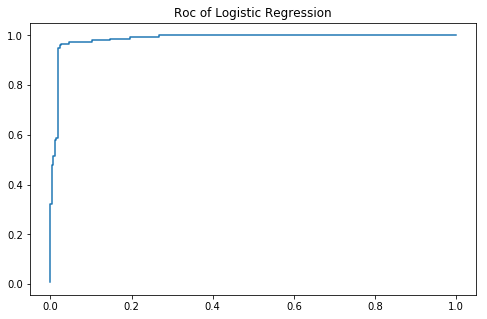

In [85]:
res = clf.predict(test_x)
clf.predict_proba(test_x)


pre = clf.predict_proba(test_x)
print(roc_auc_score(test_y,pre[:,1]))

fpr,tpr,thresholds = roc_curve(test_y,pre[:,1])
fig,ax = plt.subplots(figsize=(8,5))
plt.plot(fpr,tpr)
ax.set_title("Roc of Logistic Regression")
plt.show()

According to the LR ROC curve, when the false positive rate is extremely low, the sensitivity has reached a very high level. Indicating that the model can accurately distinguish whether to be rescued in this data set.

根据LR的ROC曲线大致判断，假阳性率极低的时候，敏感度已经达到一个很高的水准，说明该模型在这个数据集中能够相当准确地区分判断是否获救。

Extract the result of Logistic Regression.

导出LR结果

In [86]:
output = pd.DataFrame( data={"PassengerId":test["PassengerId"], "Survived":res} )
output.to_csv( "Titanic_LR.csv", index=False, quoting=3 )

### Use decision trees for training
### 利用决策树进行训练

0.836886624456


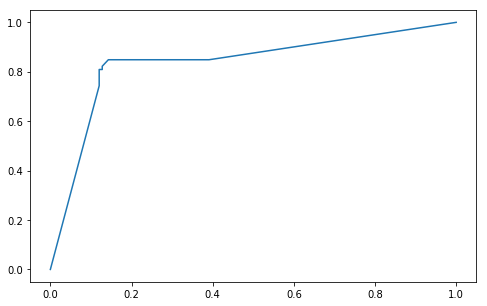

In [87]:
from sklearn import tree
clfT = tree.DecisionTreeClassifier()
clfT = clfT.fit(train_x,train_y)
resT = clfT.predict(test_x)
preT = clfT.predict_proba(test_x)
print(roc_auc_score(test_y,preT[:,1]))
fprT,tprT,thresholdsT = roc_curve(test_y,preT[:,1])
figT,axT = plt.subplots(figsize=(8,5))
plt.plot(fprT,tprT)
ax.set_title("Roc of DecisionTree")
plt.show()

From the ROC curve of the decision tree, under this data set this model is not stable enough and the miscarriage rate is high.

从决策树的ROC曲线来看，在本数据集下这是一个不够稳定的模型，误判率较高。

Out put the result of decision tree.

导出决策树结果。

In [88]:
output = pd.DataFrame( data={"PassengerId":test["PassengerId"], "Survived":resT} )
output.to_csv( "Titanic_DT.csv", index=False, quoting=3 )

### Use Naive Bayes for training
### 利用朴素贝叶斯进行训练

0.964978235061


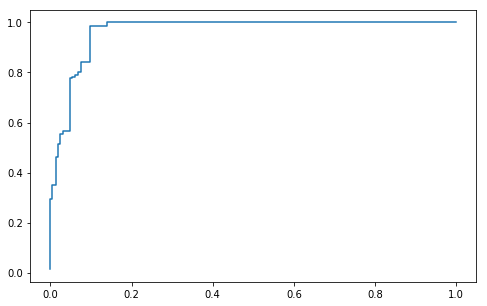

In [89]:
from sklearn.naive_bayes import BernoulliNB
#朴素贝叶斯
clfB = BernoulliNB().fit(train_x,train_y)
clfB.predict(test_x)
resB = clf.predict(test_x)
preB = clfB.predict_proba(test_x)
print(roc_auc_score(test_y,preB[:,1]))
fprB,tprB,thresholdsB = roc_curve(test_y,preB[:,1])
figB,axB = plt.subplots(figsize=(8,5))
plt.plot(fprB,tprB)
ax.set_title("Roc of NaiveBayes")
plt.show()

Naive Bayes's ROC curve shows that the model can achieve relatively high accuracy with a low misjudgment rate. Relatively speaking, it is easier to misreport unrecovered passengers as being rescued and make the rescue rate high.

朴素贝叶斯的ROC曲线表明该模型能够在误判率较低的情况下达到比较高的准确率，相对来说，更容易将未获救乘客误判为获救，使获救率虚高。

Export the result of Naive Bayes

导出贝叶斯结果

In [90]:
output = pd.DataFrame( data={"PassengerId":test["PassengerId"], "Survived":resB} )
output.to_csv( "Titanic_NB_Ber.csv", index=False, quoting=3 )

### Use SVM for training
### 利用支持向量机（SVM）进行训练

In [91]:
from sklearn import svm
# SVM
clfS = svm.SVC(probability=True)
clfS.fit(train_x,train_y)
resS = clfS.predict(test_x)
clfS.predict_proba(test_x)

array([[ 0.84505381,  0.15494619],
       [ 0.41454933,  0.58545067],
       [ 0.82769161,  0.17230839],
       [ 0.84720455,  0.15279545],
       [ 0.23919963,  0.76080037],
       [ 0.79467305,  0.20532695],
       [ 0.23038562,  0.76961438],
       [ 0.57323815,  0.42676185],
       [ 0.27758025,  0.72241975],
       [ 0.86032073,  0.13967927],
       [ 0.8457751 ,  0.1542249 ],
       [ 0.85565219,  0.14434781],
       [ 0.18931101,  0.81068899],
       [ 0.82877828,  0.17122172],
       [ 0.51664246,  0.48335754],
       [ 0.32536741,  0.67463259],
       [ 0.82535059,  0.17464941],
       [ 0.84536637,  0.15463363],
       [ 0.32640804,  0.67359196],
       [ 0.31396981,  0.68603019],
       [ 0.34368314,  0.65631686],
       [ 0.83098814,  0.16901186],
       [ 0.47882592,  0.52117408],
       [ 0.52530511,  0.47469489],
       [ 0.29536216,  0.70463784],
       [ 0.85777627,  0.14222373],
       [ 0.452851  ,  0.547149  ],
       [ 0.84536637,  0.15463363],
       [ 0.72015863,

0.938934507321


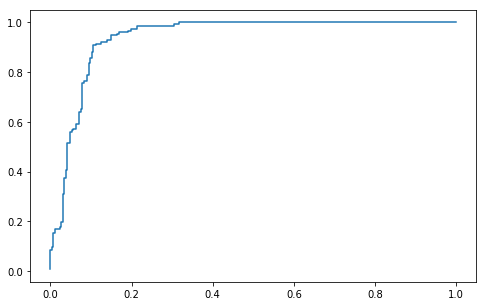

In [92]:
preS = clfS.predict_proba(test_x)
print(roc_auc_score(test_y,preS[:,1]))
fprS,tprS,thresholdsS = roc_curve(test_y,preS[:,1])
figS,axS = plt.subplots(figsize=(8,5))
plt.plot(fprS,tprS)
ax.set_title("Roc of SVM")
plt.show()

The ROC curve is similar with Naive-Bayes, there's miscarriage rate exists.

SVM的ROC曲线和朴素贝叶斯类似，存在一定的误判率。

Export the result of SVM

导出SVM结果

In [66]:
output = pd.DataFrame( data={"PassengerId":test["PassengerId"], "Survived":resS} )
output.to_csv( "Titanic_SVM.csv", index=False, quoting=3 )